# AI-Based Human Posture Detection System Using Deep Learning

## About the AI Model

This system uses MediaPipe BlazePose, a deep learning-based pose estimation model trained on large-scale human pose datasets.

The model detects 33 body landmarks and enables geometric angle analysis for posture classification.

In [1]:
!pip install mediapipe opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 12.7 MB/s eta 0:00:00
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


# AI-Based Human Posture Detection System
## 1. Import Required Libraries

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

from mediapipe.python.solutions import pose as mp_pose
from mediapipe.python.solutions import drawing_utils as mp_drawing

## 2. Load Image from URL

(-0.5, 999.5, 1332.5, -0.5)

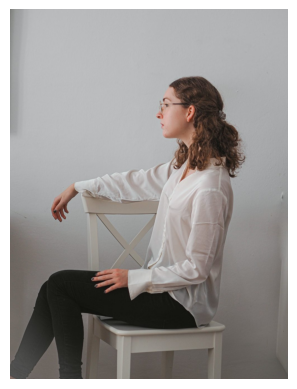

In [7]:
url = "https://images.unsplash.com/photo-1671477827852-fde9a7b874bd?w=1000&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mnx8c2l0dGluZyUyMHN0cmFpZ2h0JTIwcG9zdHVyZXxlbnwwfHwwfHx8MA%3D%3D"

response = requests.get(url)
image = Image.open(BytesIO(response.content))
image = np.array(image)

plt.imshow(image)
plt.axis('off')

## 3. Initialize MediaPipe Pose Model

In [8]:
pose = mp_pose.Pose()
results = pose.process(image)

## 4. Define Angle Calculation Function

In [9]:
def calculate_angle(a, b, c):
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - \
              np.arctan2(a[1]-b[1], a[0]-b[0])

    angle = np.abs(radians*180.0/np.pi)
    if angle > 180:
        angle = 360 - angle

    return angle

## 5. Extract Landmarks and Classify Posture and
## Display Output with Landmarks

Neck Angle: 26.05
Posture: Slouching ❌
Suggestion: Sit straight & pull shoulders back


/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


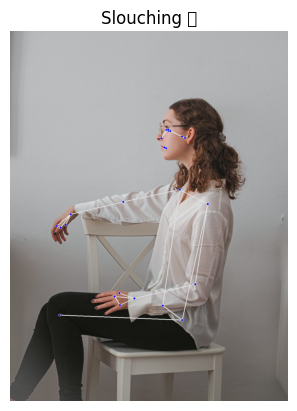

In [10]:
if results.pose_landmarks:
    landmarks = results.pose_landmarks.landmark

    shoulder = [landmarks[11].x, landmarks[11].y]
    ear = [landmarks[7].x, landmarks[7].y]
    hip = [landmarks[23].x, landmarks[23].y]

    angle = calculate_angle(shoulder, ear, hip)

    if angle < 150:
        posture = "Slouching ❌"
        suggestion = "Sit straight & pull shoulders back"
    else:
        posture = "Good Posture ✅"
        suggestion = "Keep maintaining good posture!"

    print("Neck Angle:", round(angle,2))
    print("Posture:", posture)
    print("Suggestion:", suggestion)

    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS)

    plt.title(posture)
    plt.imshow(image)
    plt.axis('off')

else:
    print("No pose detected.")

## Testing and Evaluation

The system was tested on multiple online posture images.
It correctly classified posture based on neck angle threshold.
Performance depends on image clarity and visibility of landmarks.

## Limitations

- Works on single-person images only
- Requires clear upper body visibility
- Not yet implemented for real-time webcam monitoring